# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd

---
## 2. Load data

In [2]:
df = pd.read_csv('C:/Users/sakshi/Downloads/clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('C:/Users/sakshi/Downloads/price_data (1).csv')

In [5]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:

price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [30]:
# Convert price_date to datetime format if not already done
price_df['price_date'] = pd.to_datetime(price_df['price_date'], errors='coerce')

# Extract Year and Month for grouping
price_df['year'] = price_df['price_date'].dt.year
price_df['month'] = price_df['price_date'].dt.month

# Group off-peak prices by ID and Month (Aggregating by Mean)
monthly_price_by_id = price_df.groupby(['id', 'year', 'month']).agg(
    {'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}
).reset_index()

# Get January Prices (first month of each year)
jan_prices = monthly_price_by_id[monthly_price_by_id['month'] == 1].rename(
    columns={'price_off_peak_var': 'jan_price_var', 'price_off_peak_fix': 'jan_price_fix'}
).drop(columns=['month', 'year'])

# Get December Prices (last month of each year)
dec_prices = monthly_price_by_id[monthly_price_by_id['month'] == 12].rename(
    columns={'price_off_peak_var': 'dec_price_var', 'price_off_peak_fix': 'dec_price_fix'}
).drop(columns=['month', 'year'])

# Merge December and January Prices on ID
diff = pd.merge(dec_prices, jan_prices, on='id', how='inner')

# Calculate the Difference in Off-Peak Prices (Energy & Power)
diff['offpeak_diff_dec_january_energy'] = diff['dec_price_var'] - diff['jan_price_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_price_fix'] - diff['jan_price_fix']

# Retain Relevant Columns
diff = diff[['id', 'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power']]

# Display Output
print(diff.head())


                                 id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001  


In [31]:
# Merge price difference features with the main dataset
df = df.merge(diff, on='id', how='left')

# Fill missing values (some customers might not have price data)
df[['offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power']] = df[
    ['offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power']
].fillna(0)


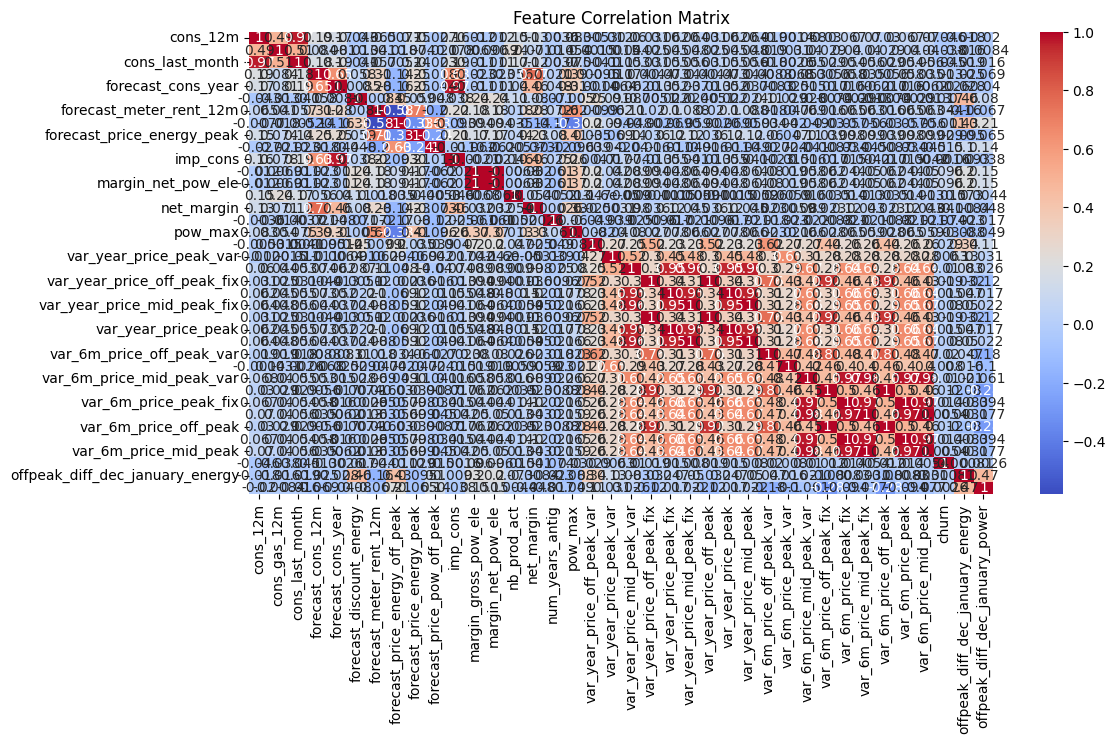

In [33]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Feature Correlation Matrix")
plt.show()




In [34]:
# Remove one of the highly correlated columns (example)
df = df.drop(columns=['var_6m_price_peak_fix'])


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['number']))


In [37]:
# Find non-numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['channel_sales', 'has_gas', 'origin_up'], dtype='object')


In [38]:
# Apply One-Hot Encoding to categorical columns
X = pd.get_dummies(X, columns=['channel_sales', 'has_gas', 'origin_up'], drop_first=True)


In [40]:
# Identify datetime columns
datetime_cols = X.select_dtypes(include=['datetime64']).columns
print("Datetime Columns:", datetime_cols)

# Drop datetime columns
X = X.drop(columns=datetime_cols)


Datetime Columns: Index(['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], dtype='object')


In [41]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8997262149212868
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.83      0.05      0.09       305

    accuracy                           0.90      2922
   macro avg       0.87      0.52      0.52      2922
weighted avg       0.89      0.90      0.86      2922



In [42]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


In [44]:
pip install imbalanced-learn



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split Resampled Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Model Again
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9503317535545024
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2639
           1       0.98      0.92      0.95      2636

    accuracy                           0.95      5275
   macro avg       0.95      0.95      0.95      5275
weighted avg       0.95      0.95      0.95      5275



In [47]:
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=len(y[y == 0]) / len(y[y == 1]))
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [49]:
# Train the Random Forest Model with Best Parameters
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9503317535545024
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2639
           1       0.98      0.92      0.95      2636

    accuracy                           0.95      5275
   macro avg       0.95      0.95      0.95      5275
weighted avg       0.95      0.95      0.95      5275



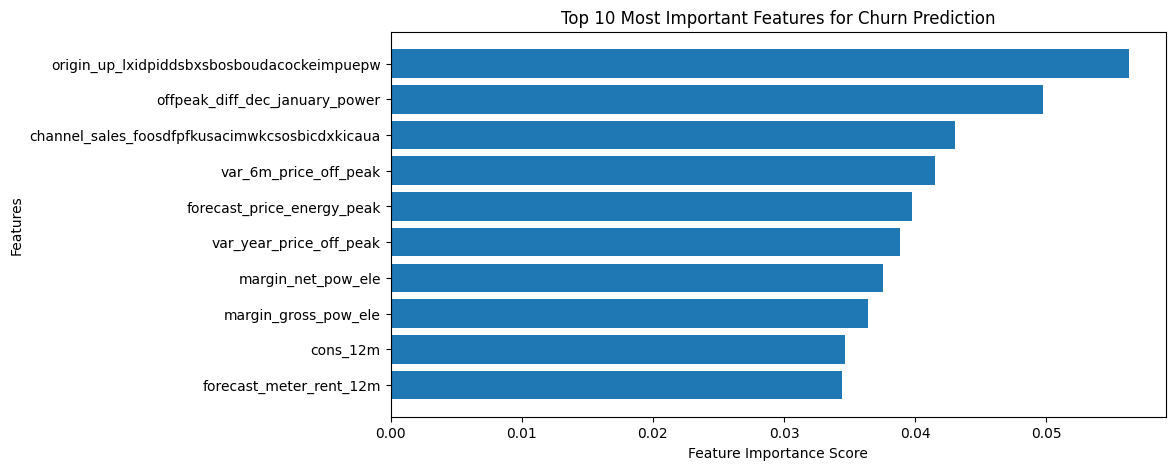

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_
features = X_train.columns

# Sort and plot top 10 important features
sorted_idx = np.argsort(feature_importances)[::-1][:10]
plt.figure(figsize=(10, 5))
plt.barh([features[i] for i in sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features for Churn Prediction")
plt.gca().invert_yaxis()
plt.show()
